In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_gps = pd.read_csv("data/dataset_1_key.csv")
data_pop = pd.read_csv("data/dataset_1.csv")

bin size = 40, dims = (41, 41)


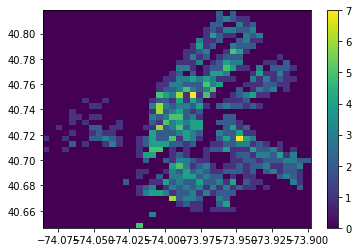

bin size = 40, dims = (41, 41)


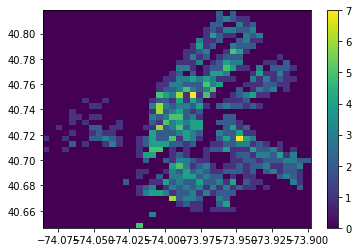

bin size = 40, dims = (41, 41)


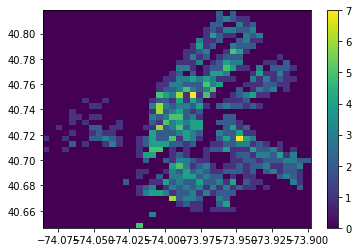

bin size = 40, dims = (41, 41)


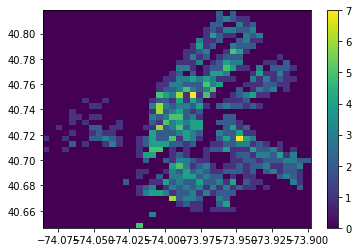

In [186]:
# filter outliers
data_gps = data_gps[(data_gps["station_latitude"] > 30) & (data_gps["station_latitude"] < 45)]

y = np.asarray(data_gps["station_latitude"])
x = np.asarray(data_gps["station_longitude"])
station_id = list(data_gps["station_id"])
stations = len(station_id)

start = list(data_pop["start_station_id"])
end = list(data_pop["end_station_id"])
trips = len(start)

#bins = 40
#bin_ids = bins*bins
districts = bins*bins

left_x = -74.0
right_x = -73.9
bottom_y = 40.64
top_y = 40.82

bin_x = np.linspace(left_x, right_x, bins+1)
bin_y = np.linspace(bottom_y, top_y, bins+1)

#width = right_x - left_x
#height = top_y - bottom_y

# zipping or binning
group_x = np.digitize(x, bin_x)-1
group_y = np.digitize(y, bin_y)-1
index = group_x + bins*group_y
# compute the bin index by group_x + bins*group_y

# plot
for bins in range(10, 50, 10):
    plt.figure()
    bins = 40
    hist, xedges, yedges, _ = plt.hist2d(x, y, bins=bins)
    plt.colorbar()
    
    print("bin size = {}, dims = ({}, {})".format(bins,len(xedges), len(yedges)))
    plt.show()
    

In [185]:
# convert to order of station_id
start_ = []
end_ = []
for k in range(trips):
    start_.append(station_id.index(start[k]))
    end_.append(station_id.index(end[k]))

# get trip times
start_time = data_pop["starttime"]
end_time = data_pop["stoptime"]
conversion_factor = 1 / 10**9 / 86400
s_time = np.asarray(pd.to_datetime(start_time).astype(int)) * conversion_factor # in days
e_time = np.asarray(pd.to_datetime(end_time).astype(int)) * conversion_factor # in days
print('Longest ride in dataset is {0:.2f} days'.format((e_time - s_time).max())) # check duration longest ride

# bin data into days
min_time = s_time.min()
max_time = s_time.max()
delta_time = int(np.ceil(max_time - min_time))
s_time = s_time - min_time

# save basic data
np.save('processed/loc_data', (x, y, index, delta_time, districts))

# compute spatially binned T and save transitions
T = np.zeros((districts, districts))
for t in range(delta_time):
    idx = np.where((s_time>=t)*(s_time<t+1))[0]
    for ids in idx:
        T[index[end_[ids]], index[start_[ids]]] += 1
    a = np.where(T > 0)
    i = a[0]
    j = a[1]
    np.save('processed/T_{}'.format(t), (i,j,T[i[:],j[:]]))
    np.save('processed/T_full_{}'.format(t), T)

Longest ride in dataset is 0.02 days


In [158]:
# load population density data

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])